In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://etfdb.com/etf/VGT/#etf-ticker-profile

In [2]:
data = pd.read_csv("VGT_historical_data.csv", names=["date", "close", "open", "high", "low", "volume", "change%"], skiprows=1)

In [3]:
data['date']= pd.to_datetime(data['date'])
data['vol_unit'] = data['volume'].str[-1]
data['volume'] = data['volume'].str[:-1]
data['volume'] = pd.to_numeric(data['volume'])
data['volume'] = np.where((data['vol_unit']=="K"),data["volume"]*1000, data["volume"]*1000000)
data.drop("vol_unit", axis = 1, inplace = True)
data['change%'] = data['change%'].str[:-1]
data['change%'] = pd.to_numeric(data['change%'])

In [4]:
data.set_index("date") # inplace = True

,close,open,high,low,volume,change%
date,,,,,,
2019-12-31,244.85,243.31,245.05,243.00,374330.0,0.27
2019-12-30,244.18,245.50,245.63,242.10,507140.0,-0.59
2019-12-27,245.64,246.71,246.75,244.93,349470.0,-0.04
2019-12-26,245.73,244.32,245.73,244.32,301470.0,0.77
2019-12-24,243.85,244.10,244.24,243.27,234600.0,0.01
...,...,...,...,...,...,...
2009-01-08,35.56,35.23,35.59,34.82,258470.0,0.85
2009-01-07,35.26,35.86,35.89,35.07,283090.0,-3.42
2009-01-06,36.51,35.83,36.92,35.83,396380.0,3.14


In [5]:
data.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2768 non-null   datetime64[ns]
 1   close    2768 non-null   float64       
 2   open     2768 non-null   float64       
 3   high     2768 non-null   float64       
 4   low      2768 non-null   float64       
 5   volume   2768 non-null   float64       
 6   change%  2768 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 151.5 KB


In [6]:
data.describe()

,close,open,high,low,volume,change%
count,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000
mean,105.478707,105.469169,106.084064,104.759892,3.469331e+05,0.078450
std,51.862243,51.851941,52.126107,51.544791,3.312650e+05,1.191584
min,29.360000,29.590000,30.410000,29.130000,4.860000e+04,-6.080000
25%,64.177500,64.127500,64.525000,63.727500,1.768325e+05,-0.480000
50%,95.670000,95.485000,96.090000,95.205000,2.693700e+05,0.130000
75%,134.810000,134.767500,135.210000,134.267500,4.040675e+05,0.680000
max,245.730000,246.710000,246.750000,244.930000,6.560000e+06,6.170000


In [7]:
missing_vals = len(pd.date_range(start="2009-01-01", end="2020-12-31", freq="B" ).difference(data['date']))
print("Missing Values: ", missing_vals)

Missing Values:  363


## EDA

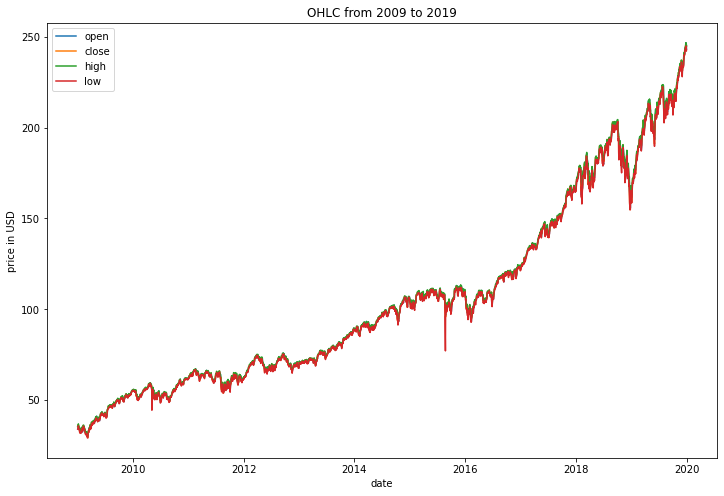

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(data.date, data[["open", "close", "high", "low"]])
plt.legend(["open", "close", "high", "low"])
plt.xlabel("date")
plt.ylabel("price in USD")
plt.title("OHLC from 2009 to 2019")
plt.show()

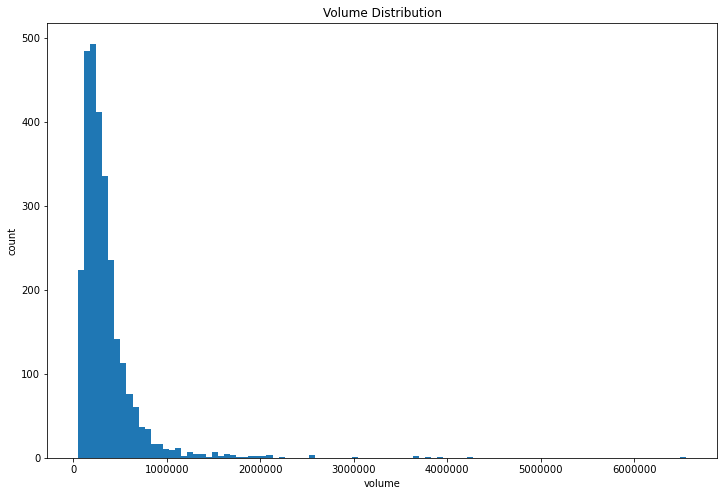

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(data.volume, bins = 100)
plt.title("Volume Distribution")
plt.xlabel("volume")
plt.ylabel("count")
plt.ticklabel_format(style='plain')
plt.show()

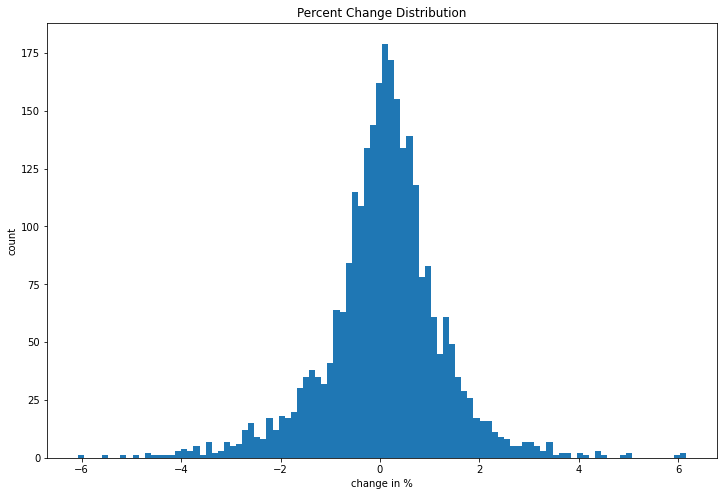

In [10]:
plt.figure(figsize=(12, 8))
plt.hist(data["change%"], bins = 100)
plt.title("Percent Change Distribution")
plt.xlabel("change in %")
plt.ylabel("count")
plt.ticklabel_format(style='plain')
plt.show()

In [169]:
normalized_data

,close,open,high,low,volume,change%
0,2.687822,2.658835,2.666438,2.682426,0.082719,0.160781
1,2.674901,2.701078,2.677567,2.664962,0.483709,-0.561078
2,2.703057,2.724418,2.699057,2.719876,0.007660,-0.099424
3,2.704793,2.678317,2.679486,2.708039,-0.137266,0.580467
4,2.668537,2.674073,2.650896,2.687665,-0.339165,-0.057455
...,...,...,...,...,...,...
2763,-1.348406,-1.354855,-1.352620,-1.357121,-0.267095,0.647616
2764,-1.354191,-1.342703,-1.346863,-1.352270,-0.192760,-2.936497
2765,-1.330085,-1.343281,-1.327100,-1.337523,0.149294,2.569775
2766,-1.351491,-1.356205,-1.347631,-1.353628,-0.387987,-0.116211


Text(0.5, 1.0, 'Correlation Matrix')

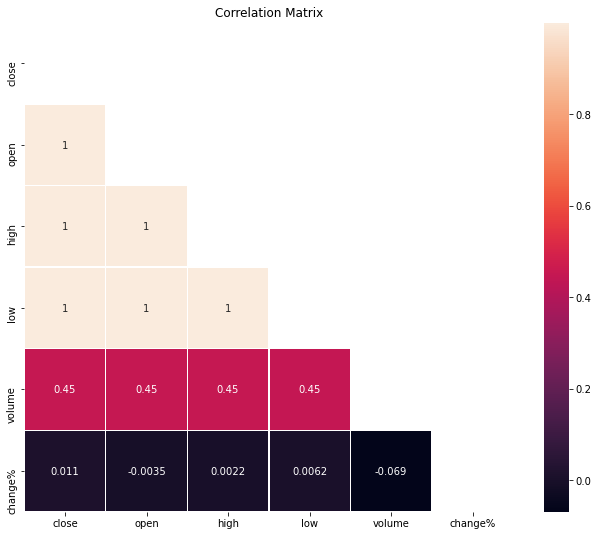

In [84]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, annot=True,square=True, linewidths=.5).set_title('Correlation Matrix')

## Train Test Split

In [186]:
# should be done BEFORE feature selection 
# Training set should be 

## Feature Selection

In [ ]:
# use correlation to eliminate similar features

In [177]:
def create_row_for_each_picture(days = 15 , sliding_window = 10, data = data):
    images = np.arange(0,len(data)-days, sliding_window) #starting date of each image 
    
    # create column names for each day for each varibale 
    indicator_per_day = []
    for indicator in data.columns[1:]:
        for day in range(days): # 15 days
            i = indicator + "_" + str(day)
            indicator_per_day.append(i)    
    
    # create row with all historical data for each picture (e.g. one row contains last 15 closing prices, opening prices, etc.)
    # create label
    data_incl_label = pd.DataFrame()
    index = []
    y_labels = []
    for image in images: 
        variables = []
        for var in data.columns[1:]:
            variables.extend(data[var].iloc[image:image+days]) 
        index.append(data["date"].iloc[image+days])
        y = ["win" if data.close.iloc[image+days-1]< data.open.iloc[image+days] else "loss"] # what if equal? 
        y_labels.extend(y)
        data_incl_label = data_incl_label.append([variables])
    data_incl_label.columns=indicator_per_day
    data_incl_label.index = index 
    
    return data_incl_label, y_labels

In [93]:
image_data, y_labels = create_row_for_each_picture()
image_data.head()

,close_0,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,...,change%_5,change%_6,change%_7,change%_8,change%_9,change%_10,change%_11,change%_12,change%_13,change%_14
2019-12-09,244.85,244.18,245.64,245.73,243.85,243.83,243.01,241.66,240.08,240.00,...,0.34,0.56,0.66,0.03,-0.19,0.62,0.65,0.97,0.66,-0.04
2019-11-22,240.46,238.97,237.43,235.14,233.60,233.70,234.91,232.36,231.72,230.94,...,-0.52,1.10,0.28,0.34,-0.79,-1.42,-0.42,0.62,0.06,1.47
2019-11-08,232.79,236.15,237.15,235.69,235.56,232.15,232.21,233.48,234.71,233.94,...,-0.03,-0.54,-0.52,0.33,0.24,0.83,-0.12,0.22,0.32,0.13
2019-10-25,233.39,231.46,231.74,231.22,230.49,230.20,228.97,227.13,227.36,227.58,...,0.54,0.81,-0.10,-0.10,0.45,1.30,-0.12,0.67,-0.81,1.15
2019-10-11,226.55,223.64,223.90,222.40,224.22,221.68,219.04,215.74,215.52,218.48,...,1.21,1.53,0.10,-1.35,1.00,-1.06,-0.10,-0.87,1.04,-0.00


### Feature Importance 

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

h0 = no causality 

p really small => high probability of causality (reject h0)

In [95]:
from sklearn.feature_selection import f_classif

In [184]:
f_scores, p_scores = f_classif(image_data, y_labels)

variables = data.columns[1:]
f_scores_calc = {}
p_scores_calc = {}

for var in data.columns[1:]:
    f_scores_calc[var] = np.mean(f_scores[:days])
    f_scores = f_scores[days:]
    
    p_scores_calc[var] = np.mean(p_scores[:days])
    p_scores = p_scores[days:]

In [145]:
f_scores_calc

{'close': 2.6785688510604833,
 'open': 2.650211723356667,
 'high': 2.597036483625182,
 'low': 2.7339951794480744,
 'volume': 0.2926375022563387,
 'change%': 9.899109585177378}

In [146]:
p_scores_calc

{'close': 0.10292652435568951,
 'open': 0.10541137424228333,
 'high': 0.1084995646086613,
 'low': 0.09960513620408772,
 'volume': 0.7056290918280116,
 'change%': 0.4866746471528247}

### Correlation

In [ ]:
# Janina 

### Normalization 

In [173]:
from sklearn.preprocessing import StandardScaler

In [179]:
data.copy().drop("date", axis=1)
scaler = StandardScaler()
normalized_data = data.copy().drop("date", axis=1)
column_names = normalized_data.columns
normalized_data = scaler.fit_transform(normalized_data)
normalized_data = pd.DataFrame(normalized_data, columns=column_names)
normalized_data["date"] = data["date"]

In [180]:
normalized_data

,close,open,high,low,volume,change%,date
0,2.687822,2.658835,2.666438,2.682426,0.082719,0.160781,2019-12-31
1,2.674901,2.701078,2.677567,2.664962,0.483709,-0.561078,2019-12-30
2,2.703057,2.724418,2.699057,2.719876,0.007660,-0.099424,2019-12-27
3,2.704793,2.678317,2.679486,2.708039,-0.137266,0.580467,2019-12-26
4,2.668537,2.674073,2.650896,2.687665,-0.339165,-0.057455,2019-12-24
...,...,...,...,...,...,...,...
2763,-1.348406,-1.354855,-1.352620,-1.357121,-0.267095,0.647616,2009-01-08
2764,-1.354191,-1.342703,-1.346863,-1.352270,-0.192760,-2.936497,2009-01-07
2765,-1.330085,-1.343281,-1.327100,-1.337523,0.149294,2.569775,2009-01-06
2766,-1.351491,-1.356205,-1.347631,-1.353628,-0.387987,-0.116211,2009-01-05
